# 7. K-Nearest Neighbors (KNN) for Diabetes Classification

## What is KNN?
K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for both classification and regression tasks. KNN operates on the principle that similar data points tend to be located close to each other in the feature space.

In the case of classification, KNN predicts the class of a new data point by looking at the classes of its K nearest neighbors in the training dataset. The "K" in KNN refers to the number of nearest neighbors considered. The class that appears most frequently among the K nearest neighbors is assigned as the predicted class for the new data point.

KNN is known as a lazy learning algorithm because it doesn't build a model during training. Instead, it stores the training data and performs the computation when a prediction is needed. The distance between data points is typically measured using Euclidean distance or other distance metrics.

## Diabetes Classification using KNN
In this code, we will use the KNN algorithm to classify patients as having diabetes or not based on various features such as glucose level, blood pressure, insulin level, BMI, and more.

Here's an overview of the steps we'll follow:

1. Load the diabetes dataset and display the first few rows to understand the data.
2. Prepare the data by separating the features (X) and the target variable (y).
3. Split the data into training and testing sets.
4. Perform a parameter search to find the optimal number of neighbors (K) for the KNN classifier.
5. Train the KNN classifier with the best K value.
6. Evaluate the trained model on the testing set and calculate the accuracy.
7. Visualize the decision boundaries of the KNN classifier using two selected features.
8. Generate and visualize the confusion matrix to assess the model's performance.

By following these steps, we aim to build a KNN classifier that can effectively predict whether a patient has diabetes based on their clinical measurements.

Let's dive into the code and see how we can implement this diabetes classification task using KNN!

1. Prepare the dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Datasets/diabetes.csv')


# Remove rows where 'Glucose' or 'BloodPressure' are zero
data = data[(data['Glucose'] != 0) & (data['BloodPressure'] != 0)]

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Then we get data prepared and then to send them into training.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set theme for plotting
sns.set_theme()

# Create feature matrix (all columns except 'Outcome')
X = data.drop('Outcome', axis=1).to_numpy()

# Create target value array
y = data['Outcome'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)


I would like to see which one of n-neighbors would be the best fit for the prediction. So I build a for-loop around the trianing to test it.

Accuracy for n_neighbors = 3: 0.74
Accuracy for n_neighbors = 4: 0.76
Accuracy for n_neighbors = 5: 0.74
Accuracy for n_neighbors = 6: 0.76
Accuracy for n_neighbors = 7: 0.74
Accuracy for n_neighbors = 8: 0.76
Accuracy for n_neighbors = 9: 0.75
Accuracy for n_neighbors = 10: 0.77
Accuracy for n_neighbors = 11: 0.76
Accuracy for n_neighbors = 12: 0.81
Accuracy for n_neighbors = 13: 0.79
Accuracy for n_neighbors = 14: 0.78
Accuracy for n_neighbors = 15: 0.78
Accuracy for n_neighbors = 16: 0.79
Accuracy for n_neighbors = 17: 0.78
Accuracy for n_neighbors = 18: 0.79
Accuracy for n_neighbors = 19: 0.76


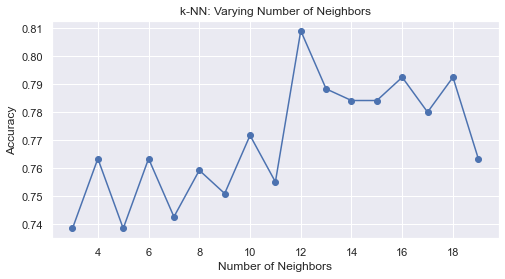

In [3]:

# Range of 'n_neighbors' to evaluate
neighbors_settings = range(3, 20)

# List to store the accuracies for each value of n_neighbors
accuracies = []

for n_neighbors in neighbors_settings:
    # Instantiate the KNN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy for n_neighbors = {n_neighbors}: {accuracy:.2f}")

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(neighbors_settings, accuracies, marker='o')
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

It seems like 12 neighbors have the best accuracy. Thus we train our model that have 14 neighbors.

In [4]:
clf = KNeighborsClassifier(n_neighbors=12)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Optionally, you can now evaluate the model with X_test and y_test
# For example, to check the model's accuracy:
accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8091286307053942


After that, for the sake of simplicity, I pick Glucose and BMI which seems the most relevant two to the diabetes and plot the region.

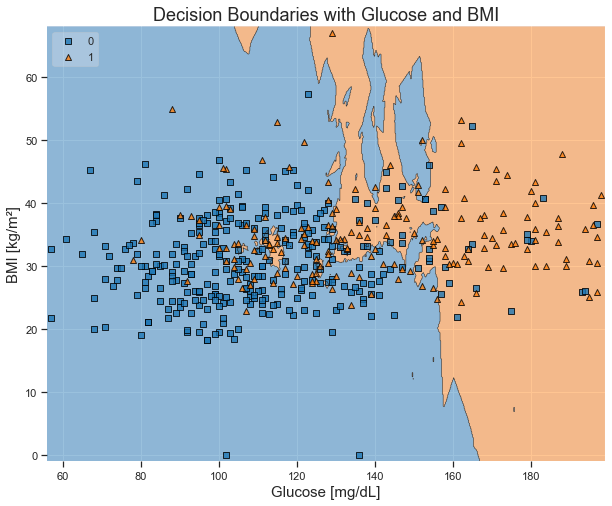

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Select two most crucial variables, here 'Glucose' and 'BMI'
X2 = data[['Glucose', 'BMI']].values
y2 = data['Outcome'].values

# Split the dataset into training and testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=13)

# Train a new classifier using only the two selected features
clf2 = KNeighborsClassifier(n_neighbors=14)
clf2.fit(X_train2, y_train2)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train2, y_train2, clf=clf2, legend=2)
plt.xlabel('Glucose [mg/dL]', fontsize=15)
plt.ylabel('BMI [kg/m²]', fontsize=15)
plt.title('Decision Boundaries with Glucose and BMI', fontsize=18)
plt.show()

We use the confusion matrix to measure the performance of the model.

Confusion Matrix:
[[152  16]
 [ 30  43]]



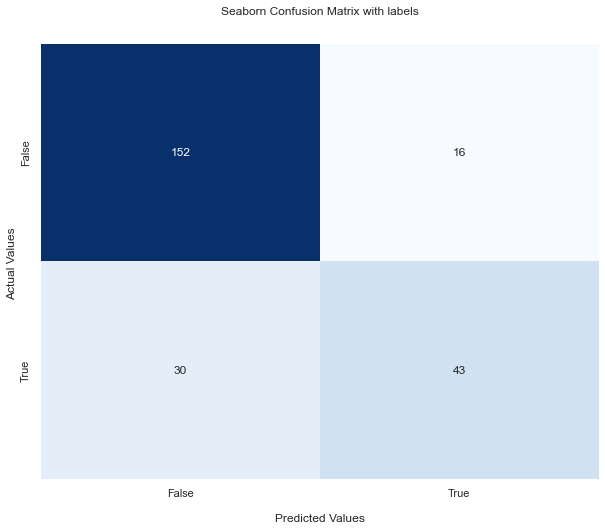

In [6]:
from sklearn.metrics import confusion_matrix

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"Confusion Matrix:\n{cf_matrix}\n")

# View the confusion matrix using the seaborn package
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)  # 'fmt' argument is to avoid scientific notation

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order here, it should be False and True or [0,1]
ax.xaxis.set_ticklabels(['False', 'True'])  # Adjust these based on your data
ax.yaxis.set_ticklabels(['False', 'True'])  # Adjust these based on your data

# Display the visualization of the Confusion Matrix.
plt.show()